

# Name: Manpreet Singh
# UID: 20BCS6444

# AIM: To determine the Social Networking ads

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warningsngsngs.filterwarnings('ignore')

# IMPORTING DATASET

In [2]:
df = pd.read_csv("D:\PYTHON\Python For Machine Learning\Data\Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df = df.drop(['User ID'], axis=1)

<h3> There are no Null values present in the data

In [4]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [6]:
df.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

<h3> Converting Categorical column to Numerical column by replacing the data with either 0 or 1

In [8]:
df['Gender'].replace(['Male', 'Female'],[0, 1], inplace=True)

In [9]:
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


# SCALING

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(df[['Age','EstimatedSalary']])

<h3> Scaling the 'Age' and 'EstimatedSalary' column into range 0 to 1

In [12]:
df[['Age', 'EstimatedSalary']] = scaler.transform(df[['Age','EstimatedSalary']])

In [13]:
df

,Gender,Age,EstimatedSalary,Purchased
0,0,0.023810,0.029630,0
1,0,0.404762,0.037037,0
2,1,0.190476,0.207407,0
3,1,0.214286,0.311111,0
4,0,0.023810,0.451852,0
...,...,...,...,...
395,1,0.666667,0.192593,1
396,0,0.785714,0.059259,1
397,1,0.761905,0.037037,1
398,0,0.428571,0.133333,0


<h3> Seperating the Dataset into X and Y where Y is target column

In [14]:
X = df.iloc[:,1:3]
Y = df.iloc[:,3]

In [15]:
X

,Age,EstimatedSalary
0,0.023810,0.029630
1,0.404762,0.037037
2,0.190476,0.207407
3,0.214286,0.311111
4,0.023810,0.451852
...,...,...
395,0.666667,0.192593
396,0.785714,0.059259
397,0.761905,0.037037
398,0.428571,0.133333


In [16]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

<h3> Seperating the dataset into Training set and Testing set

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=.2)

<h3> Importing SVM Model

In [19]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear')
model.fit(xtrain,ytrain)

SVC(kernel='linear')

In [20]:
ypred = model.predict(xtest)
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1], dtype=int64)

In [21]:
model.score(xtest, ytest)

0.775

# MAKING THE CONFUSION MATRIX

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)

<AxesSubplot:>

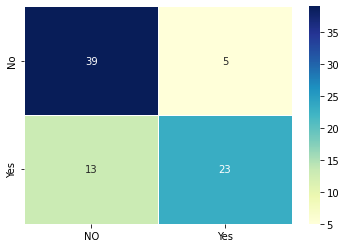

In [23]:
import seaborn as sns
sns.heatmap(cm, linewidth=0.5, cmap='YlGnBu', annot=True, xticklabels=['NO', 'Yes'], yticklabels=['No', 'Yes'], fmt="n")

# VISULAISATION

In [25]:
from matplotlib.colors import ListedColormap
X_set, y_set = xtest.values, ytest.values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

In [30]:
X1

array([[-0.97619048, -0.96619048, -0.95619048, ...,  1.97380952,
         1.98380952,  1.99380952],
       [-0.97619048, -0.96619048, -0.95619048, ...,  1.97380952,
         1.98380952,  1.99380952],
       [-0.97619048, -0.96619048, -0.95619048, ...,  1.97380952,
         1.98380952,  1.99380952],
       ...,
       [-0.97619048, -0.96619048, -0.95619048, ...,  1.97380952,
         1.98380952,  1.99380952],
       [-0.97619048, -0.96619048, -0.95619048, ...,  1.97380952,
         1.98380952,  1.99380952],
       [-0.97619048, -0.96619048, -0.95619048, ...,  1.97380952,
         1.98380952,  1.99380952]])

In [31]:
X2

array([[-0.99259259, -0.99259259, -0.99259259, ..., -0.99259259,
        -0.99259259, -0.99259259],
       [-0.98259259, -0.98259259, -0.98259259, ..., -0.98259259,
        -0.98259259, -0.98259259],
       [-0.97259259, -0.97259259, -0.97259259, ..., -0.97259259,
        -0.97259259, -0.97259259],
       ...,
       [ 1.94740741,  1.94740741,  1.94740741, ...,  1.94740741,
         1.94740741,  1.94740741],
       [ 1.95740741,  1.95740741,  1.95740741, ...,  1.95740741,
         1.95740741,  1.95740741],
       [ 1.96740741,  1.96740741,  1.96740741, ...,  1.96740741,
         1.96740741,  1.96740741]])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


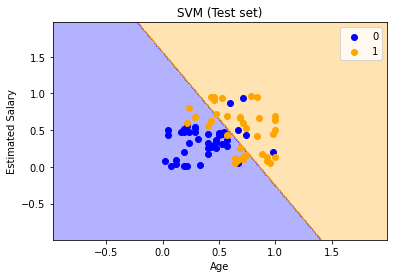

In [37]:
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('blue', 'orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'orange'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()